In [1]:
# Cell 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Cell 2: Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Cell 3: Define function to add noise
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0., 1.)

In [4]:
# Cell 4: Add noise to images
noisy_train_images = add_noise(train_images)
noisy_test_images = add_noise(test_images)

In [5]:
# Cell 5: Reshape images for the model
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
noisy_train_images = noisy_train_images.reshape((60000, 28, 28, 1))
noisy_test_images = noisy_test_images.reshape((10000, 28, 28, 1))

In [6]:
# Cell 6: Create the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
# Cell 7: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Cell 8: Train the model
history = model.fit(noisy_train_images, train_labels, epochs=10, 
                    validation_data=(noisy_test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3192 - accuracy: 0.8975 - val_loss: 0.1248 - val_accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1281 - accuracy: 0.9590 - val_loss: 0.1019 - val_accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1005 - accuracy: 0.9675 - val_loss: 0.0856 - val_accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0829 - accuracy: 0.9731 - val_loss: 0.0900 - val_accuracy: 0.9721
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0702 - accuracy: 0.9764 - val_loss: 0.1042 - val_accuracy: 0.9669
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0563 - accuracy: 0.9816 - val_loss: 0.1125 - val_accuracy: 0.9647
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0456 - accuracy: 0.9848 - val_loss: 0.1035 -

In [9]:
# Cell 9: Evaluate the model
test_loss, test_acc = model.evaluate(noisy_test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.1170 - accuracy: 0.9694 - 1s/epoch - 4ms/step

Test accuracy: 0.9693999886512756


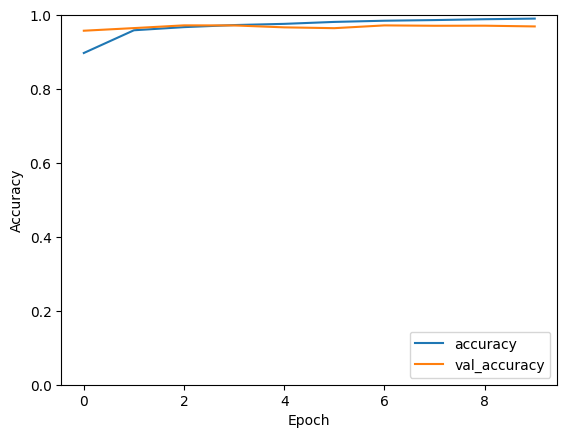

In [10]:
# Cell 10: Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [11]:
# Cell 11: Save the model
model.save('mnist_noisy_classifier.h5')

c:\Users\Sai\Desktop\NN_digit_classifier\Southampton_NN_digit_classifier\env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
# Cell 12: Define function to predict a single image
def predict_digit(image):
    image = image.reshape(1, 28, 28, 1) / 255.0
    prediction = model.predict(image)
    return np.argmax(prediction)

1/1 [==============================] - 0s 88ms/step


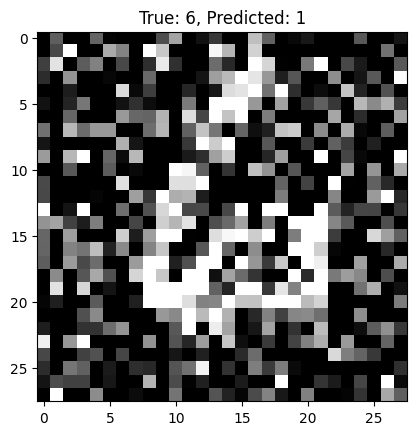

In [13]:
# Cell 13: Test the model with a sample noisy image
sample_index = np.random.randint(0, len(test_images))
sample_image = noisy_test_images[sample_index]
true_label = test_labels[sample_index]
predicted_label = predict_digit(sample_image)

plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f'True: {true_label}, Predicted: {predicted_label}')
plt.show()

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Resize function (as you've already implemented)
def resize_images(images, new_size=(16, 16)):
    resized_images = np.zeros((images.shape[0], new_size[0], new_size[1]), dtype=np.float32)
    scale_x, scale_y = 28 / new_size[0], 28 / new_size[1]
    for i in range(new_size[0]):
        for j in range(new_size[1]):
            x, y = int(scale_x * i), int(scale_y * j)
            resized_images[:, i, j] = images[:, x, y]
    return resized_images / 255.0

# Resize images to 16x16
train_images_resized = resize_images(train_images)
test_images_resized = resize_images(test_images)

# Function to add noise
def add_noise(images, noise_factor=0.4):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0., 1.)

# Create noisy versions for training
train_images_noisy = add_noise(train_images_resized)
test_images_noisy = add_noise(test_images_resized)

# Reshape for the model
train_images_noisy = train_images_noisy.reshape(-1, 16, 16, 1)
test_images_noisy = test_images_noisy.reshape(-1, 16, 16, 1)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Train the model
history = model.fit(
    data_augmentation(train_images_noisy),
    train_labels,
    epochs=50,
    validation_split=0.2,
    batch_size=128,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_noisy, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Save the model
model.save('mnist_noisy_16x16_classifier.h5')

# Function to predict a single image
def predict_digit(image):
    image = image.reshape(1, 16, 16, 1)
    prediction = model.predict(image)
    return np.argmax(prediction)

# Test with a sample noisy image
sample_index = np.random.randint(0, len(test_images_noisy))
sample_image = test_images_noisy[sample_index]
true_label = test_labels[sample_index]
predicted_label = predict_digit(sample_image)

print(f'True label: {true_label}, Predicted label: {predicted_label}')

Epoch 1/50
375/375 [==============================] - 5s 12ms/step - loss: 1.3016 - accuracy: 0.5606 - val_loss: 0.7243 - val_accuracy: 0.7752
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 0.8177 - accuracy: 0.7329 - val_loss: 0.5339 - val_accuracy: 0.8290
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: 0.6718 - accuracy: 0.7836 - val_loss: 0.4573 - val_accuracy: 0.8510
Epoch 4/50
375/375 [==============================] - 4s 11ms/step - loss: 0.6038 - accuracy: 0.8077 - val_loss: 0.4283 - val_accuracy: 0.8621
Epoch 5/50
375/375 [==============================] - 4s 11ms/step - loss: 0.5561 - accuracy: 0.8230 - val_loss: 0.4098 - val_accuracy: 0.8672
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: 0.5254 - accuracy: 0.8347 - val_loss: 0.3853 - val_accuracy: 0.8744
Epoch 7/50
375/375 [==============================] - 4s 11ms/step - loss: 0.4982 - accuracy: 0.8404 - val_loss: 0.3828 - val_accuracy: 0.8744

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
from skimage.transform import resize

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Function to resize images
def resize_images(images, new_size):
    resized = np.zeros((images.shape[0], new_size, new_size))
    for i, image in enumerate(images):
        resized[i] = resize(image, (new_size, new_size), anti_aliasing=True)
    return resized

# Resize to 16x16
train_images = resize_images(train_images, 16)
test_images = resize_images(test_images, 16)

# Reshape and normalize
train_images = train_images.reshape((train_images.shape[0], 16, 16, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 16, 16, 1)).astype('float32') / 255

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
])

# Noise Injection
def add_noise(images):
    noise = np.random.normal(loc=0, scale=0.1, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

# Model Definition
def create_model():
    model = models.Sequential([
        data_augmentation,
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create an ensemble of models
num_models = 3
models = [create_model() for _ in range(num_models)]

# Compile and train each model
for i, model in enumerate(models):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Add noise to a copy of the training data
    noisy_train_images = add_noise(train_images)
    
    print(f"Training model {i+1}/{num_models}")
    model.fit(noisy_train_images, train_labels, epochs=10, 
              validation_split=0.1,
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

# Function to get ensemble predictions
def ensemble_predict(images):
    predictions = [model.predict(images) for model in models]
    return np.mean(predictions, axis=0)

# Evaluate the ensemble
ensemble_test_predictions = ensemble_predict(test_images)
ensemble_test_accuracy = np.mean(np.argmax(ensemble_test_predictions, axis=1) == test_labels)
print(f"Ensemble Test Accuracy: {ensemble_test_accuracy:.4f}")

# Save the ensemble model
for i, model in enumerate(models):
    model.save(f'mnist_noisy_16x16_model_{i+1}.h5')

print("Models saved. To use the ensemble, load all models and use the ensemble_predict function.")

Training model 1/3
Epoch 1/10
1688/1688 [==============================] - 12s 6ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 11s 6ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 3/10
1688/1688 [==============================] - 11s 6ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Training model 2/3
Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 2.3015 - accuracy: 0.1133 - val_loss: 2.3024 - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 2.3013 - accura

c:\Users\Sai\Desktop\NN_digit_classifier\Southampton_NN_digit_classifier\env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
from skimage.transform import resize

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Function to resize images
def resize_images(images, new_size):
    resized = np.zeros((images.shape[0], new_size, new_size))
    for i, image in enumerate(images):
        resized[i] = resize(image, (new_size, new_size), anti_aliasing=True)
    return resized

# Resize to 16x16
train_images = resize_images(train_images, 16)
test_images = resize_images(test_images, 16)

# Reshape and normalize
train_images = train_images.reshape((train_images.shape[0], 16, 16, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 16, 16, 1)).astype('float32') / 255

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
])

# Noise Injection
def add_noise(images, noise_factor=0.2):
    noise = np.random.normal(loc=0, scale=noise_factor, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

# Model Definition
def create_model():
    model = models.Sequential([
        data_augmentation,
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(16, 16, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create an ensemble of models
num_models = 3
models = [create_model() for _ in range(num_models)]

# Compile and train each model
for i, model in enumerate(models):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Add noise to a copy of the training data
    noisy_train_images = add_noise(train_images)
    
    print(f"Training model {i+1}/{num_models}")
    model.fit(noisy_train_images, train_labels, epochs=50, 
              validation_split=0.1,
              batch_size=128,
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

# Function to get ensemble predictions
def ensemble_predict(images):
    predictions = [model.predict(images) for model in models]
    return np.mean(predictions, axis=0)

# Evaluate the ensemble
ensemble_test_predictions = ensemble_predict(test_images)
ensemble_test_accuracy = np.mean(np.argmax(ensemble_test_predictions, axis=1) == test_labels)
print(f"Ensemble Test Accuracy: {ensemble_test_accuracy:.4f}")

# Save the ensemble model
for i, model in enumerate(models):
    model.save(f'mnist_noisy_16x16_model_{i+1}.h5')

print("Models saved. To use the ensemble, load all models and use the ensemble_predict function.")

Training model 1/3
Epoch 1/50
422/422 [==============================] - 51s 116ms/step - loss: 2.6429 - accuracy: 0.1040 - val_loss: 2.3937 - val_accuracy: 0.0980
Epoch 2/50
422/422 [==============================] - 49s 116ms/step - loss: 2.3809 - accuracy: 0.1023 - val_loss: 33.5855 - val_accuracy: 0.1050
Epoch 3/50
422/422 [==============================] - 49s 116ms/step - loss: 2.3378 - accuracy: 0.1046 - val_loss: 27.3055 - val_accuracy: 0.0952
Epoch 4/50
422/422 [==============================] - 49s 116ms/step - loss: 2.3221 - accuracy: 0.1054 - val_loss: 14.9447 - val_accuracy: 0.0952
Epoch 5/50
422/422 [==============================] - 49s 116ms/step - loss: 2.3132 - accuracy: 0.1050 - val_loss: 2.3278 - val_accuracy: 0.1018
Epoch 6/50
422/422 [==============================] - 49s 116ms/step - loss: 2.3091 - accuracy: 0.1063 - val_loss: 8.6763 - val_accuracy: 0.1053
Epoch 7/50
422/422 [==============================] - 47s 111ms/step - loss: 2.3103 - accuracy: 0.1062 - val

In [ ]:
import os
import subprocess
import time

def git_push_models():
    try:
        # Add all changes
        subprocess.run(["git", "add", "."], check=True)
        
        # Commit changes
        commit_message = "Trained models updated"
        subprocess.run(["git", "commit", "-m", commit_message], check=True)
        
        # Push changes
        subprocess.run(["git", "push"], check=True)
        
        print("Successfully pushed models to repository")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred while pushing to git: {e}")

def wait_for_models():
    model_files = [f'mnist_noisy_16x16_model_{i+1}.h5' for i in range(3)]
    while not all(os.path.exists(f) for f in model_files):
        print("Waiting for all models to finish training...")
        time.sleep(60)  # Check every minute
    print("All models have been trained and saved.")

# Wait for models to finish training
wait_for_models()

# Push models to git
git_push_models()

print("Process complete. Models have been pushed to the repository.")